In [1]:
#%%capture
!pip install pip3-autoremove
!pip-autoremove torch torchvision torchaudio -y
!pip install torch torchvision torchaudio xformers --index-url https://download.pytorch.org/whl/cu121
!pip install unsloth

dill 0.3.8 is installed but dill<0.3.2,>=0.3.1.1 is required
Redoing requirement with just package name...
cloudpickle 3.0.0 is installed but cloudpickle~=2.2.1 is required
Redoing requirement with just package name...
numpy 1.26.4 is installed but numpy<1.25.0,>=1.14.3 is required
Redoing requirement with just package name...
pyarrow 16.1.0 is installed but pyarrow<10.0.0,>=3.0.0 is required
Redoing requirement with just package name...
jupyterlab 4.2.5 is installed but jupyterlab~=3.6.0 is required
Redoing requirement with just package name...
google-cloud-bigquery 2.34.4 is installed but google-cloud-bigquery[bqstorage,pandas]>=3.10.0 is required
Redoing requirement with just package name...
google-cloud-storage 1.44.0 is installed but google-cloud-storage>=2.0.0 is required
Redoing requirement with just package name...
pandas 2.2.2 is installed but pandas<2.1.4,>=1.5.0 is required
Redoing requirement with just package name...
botocore 1.35.23 is installed but botocore<1.30.0,>=1.29

In [2]:
# Shk4/anaf13
# 

from unsloth import FastVisionModel
model, tokenizer = FastVisionModel.from_pretrained(
  model_name = "Shk4/anaf13", # YOUR MODEL YOU USED FOR TRAINING
  load_in_4bit = True, # Set to False for 16bit LoRA
)
FastVisionModel.for_inference(model) # Enable for inference!


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2024.11.11: Fast Mllama vision patching. Transformers: 4.46.3.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/385k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-31): 32 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

In [4]:
from PIL import Image
import requests
from io import BytesIO


from transformers import TextStreamer

In [14]:
def reader00(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  display(img)
  image = img
  instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns, up to 2 patterns."
  messages = [
     {"role": "user", "content": [
         {"type": "image"},
         {"type": "text", "text": instruction}
      ]}
  ]
  input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
  inputs = tokenizer(
     image,
     input_text,
     add_special_tokens = False,
     return_tensors = "pt",
  ).to("cuda")
  text_streamer = TextStreamer(tokenizer, skip_prompt = True)
  _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 2048,
                   use_cache = False, temperature = 1.1, min_p = 0.1)


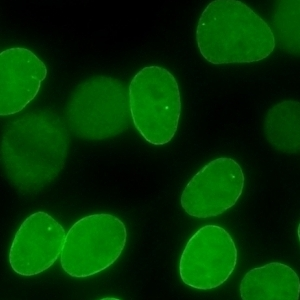

Homogeneous and Speckled 

 Homogeneous: Nuclear envelope reveals a homogeneous hyptense and dull staining.
 Speckled: Known as Cajal bodies or coiled bodies, these are seen as up to 3-5 irregularly distributed denser staining areas (speckles) across all nucleoplasm.<|eot_id|>


In [15]:
reader00('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC11_1.jpg')

In [16]:
def reader01(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  display(img)
  image = img
  instruction = "You are an expert in antinuclear antibody tests. Describe possible patterns, up to 2 patterns."
  messages = [
     {"role": "user", "content": [
         {"type": "image"},
         {"type": "text", "text": instruction}
      ]}
  ]
  input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
  inputs = tokenizer(
     image,
     input_text,
     add_special_tokens = False,
     return_tensors = "pt",
  ).to("cuda")
  text_streamer = TextStreamer(tokenizer, skip_prompt = True)
  _ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 2048,
                   use_cache = False, temperature = 1., min_p = 0.1)


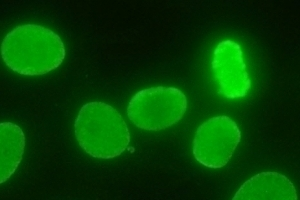

Nucleoli 

 Homogeneous 
 Homogeneous with Speckles<|eot_id|>


In [17]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC01_1.jpg')

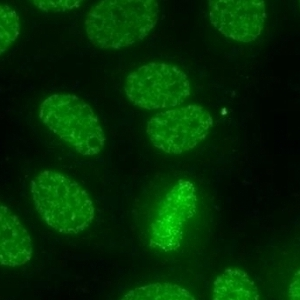

Certainly. These are known as Cajal bodies and speak to a nuclear envelope abnormality known as Cajal body enchromatosis (AC-1).<|eot_id|>


In [18]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC02_1.jpg')
     

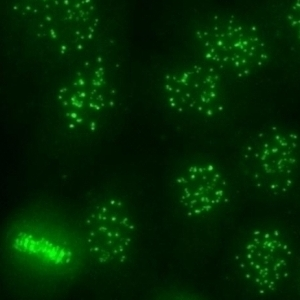

Sure, here are two patterns:
 
 Coarse speckles (AC-1)
 Densely distributed coarse speckles (AC-2)<|eot_id|>


In [19]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC03_1.jpg')

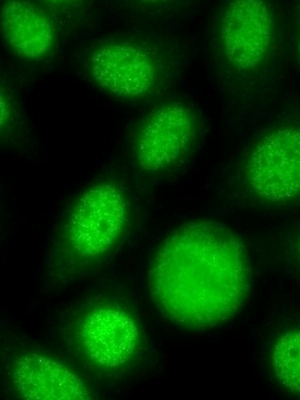

Homogeneous and Speckled 

 Homogeneous: Nuclear envelope reveals a homogeneous staining.
 Speckled: Known as the Cajal body, these structures are seen as 1 to 2 dozen very fine speckles within the nucleus.<|eot_id|>


In [20]:
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC04_1.jpg')

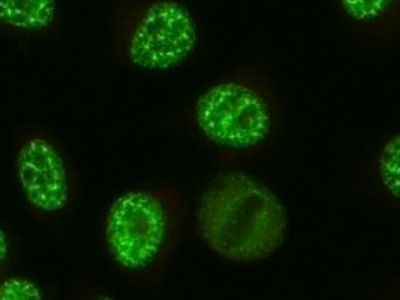

Homogeneous (AC-1) 
 Nuclear envelope reveals a uniform fluorescence across all nucleoplasm.

 Dense fine speckles (AC-2)
 Nuclear envelope reveals a punctate fluorescence across all nucleoplasm.<|eot_id|>


In [21]:
 
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC05_1.jpg')

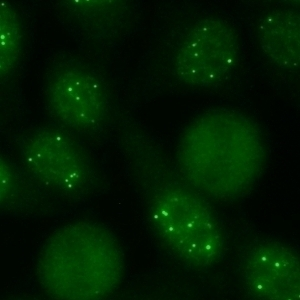

Coarse speckles (40-80/cell) (AC-1) and homogenous (AC-2)<|eot_id|>


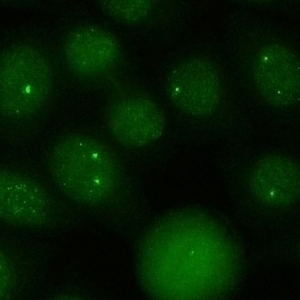

Nuclear envelope (Homogeneous and Speckled) 

 Homogeneous: The entire nucleus is stained with a uniform hyposensitivity to the dye.
 Speckled: The nucleus has some denser areas known as speckles, which are not stained.
<|eot_id|>


In [22]:

reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC06_1.jpg')

reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC07_1.jpg')

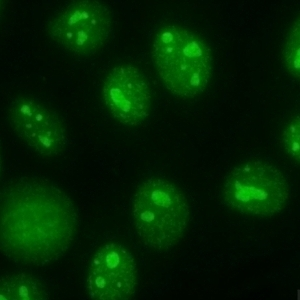

Homogeneous and speckled patterns.<|eot_id|>


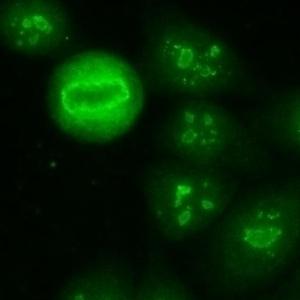

Sure, here are two possible patterns:

* Densely distributed coarse speckles (known as Cajal bodies or coiled bodies)
* Centromere staining (known as the characteristic "วล" pattern)<|eot_id|>


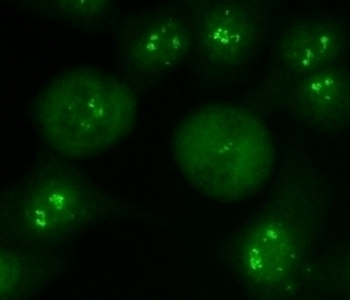

Homogeneous and speckled patterns.<|eot_id|>


In [23]:

reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC08_1.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC09_1.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC10_1.jpg')

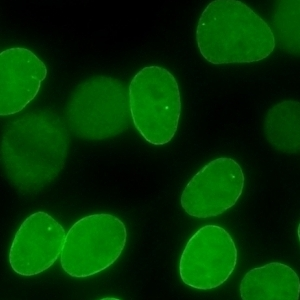

Nucleolar (Homogeneous/Cytoplasmic)

 Homogeneous and cytoplasmic patterns are considered as a single pattern because they share some similarities. Homogeneous antinuclear antibody tests reveal a uniform and regular fluorescence across all nucleoplasm. Cytoplasmic patterns show a peculiar accentuation of fluorescence at the points where the metaphase chromatin plates touch the cytoplasm.<|eot_id|>


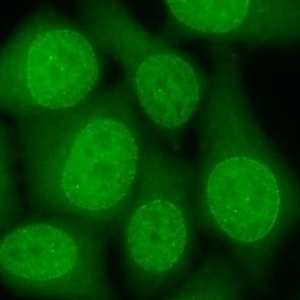

Homogeneous and Speckled 

 Homogeneous: Nuclear envelope reveals a homogeneous hydrotic accentuation with a peri-chromosomal accentuation at the points where adjacent cells touch each other.
 Speckled: Irregularly distributed tiny speckles across all nucleoplasm. The nucleoli maybe stained or not stained.
<|eot_id|>


In [24]:

reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC11_1.jpg')
reader01('https://raw.githubusercontent.com/Sihwan4/anabot/refs/heads/main/imgDB/AC12_1.jpg')

# Training

Total